In [7]:
import sys 
sys.path.append("..") 
import os
import pandas as pd
from utils import config

from sklearn.model_selection import train_test_split

# config.xls_path = '../Train-Data/Mix6_mainCat_20/pro_review.xlsx'
# config.xls_path = '/home/eagleuser/Users/leyan/Train-Data/Mix6_mainCat_new/pro_review.xlsx'

# path = str(os.path.abspath(config.xls_path)).replace('Summarize_parallel','')
total_df = pd.read_excel(str(os.path.abspath(config.xls_path)).replace('Summarize_parallel',''))
# total_df = total_df[total_df['review_len']>=50]
# total_df = total_df[total_df['summary_len']>=5]
total_df = total_df.sort_values(by=['review_len','overlap'], ascending = False)
train_df, val_df = train_test_split(total_df, test_size=0.1, 
                                    random_state=0, shuffle=True)

print(len(total_df))
print(len(train_df))
print(len(val_df))

# train : 504075(90%),    test : 56009(10%) -> best 566084

632610
569349
63261


In [8]:
def longest_common_subsequence(main_string, comparing_string):

#     main_string = main_string.split(" ")
#     comparing_string = comparing_string.split(" ")
    columns_length = len(main_string)  # Get the length of the first word or base word
    rows_length = len(comparing_string)  # Get the length of the second word or comparing word

    # MAKE A 2D LIST (MATRIX)
    dynamic_table = [[0] * (columns_length + 1) for i in range(rows_length + 1)]

    # rows_length = NUMBER OF ROWS
    # columns_length = NUMBER OF COLUMNS
    
    # FILL THE MATRIX FOLLOWING LCS ALGORITHM.
    for i in range(1, rows_length + 1):
        for j in range(1, columns_length + 1):
            if main_string[j - 1] == comparing_string[i - 1]:
                dynamic_table[i][j] = 1 + dynamic_table[i - 1][j - 1]

            else:
                dynamic_table[i][j] = max(dynamic_table[i - 1][j], dynamic_table[i][j - 1])

#     print("MATRIX ACCORDING TO LONGEST COMMON SUBSEQUENCE ALGORITHM: \n ")

    # for i in range(rows_length + 1):
    #     print(dynamic_table[i])

    #print("LENGTH OF LONGEST COMMON SUBSEQUENCE = ", dynamic_table[rows_length][columns_length])

    len_lcs = dynamic_table[rows_length][columns_length]

    i = len(comparing_string)
    j = len(main_string)

    lcs_string = str()

    # BACKTRACKING TO FIND THE LONGEST COMMON SUBSEQUENCE

    temp = True

    while temp is True:
        if dynamic_table[i][j] == 0:
            temp = False
        elif dynamic_table[i][j] == dynamic_table[i][j - 1]:
            j = j - 1

        else:
            lcs_string = main_string[j-1] + " " + lcs_string
            i = i - 1
            j = j - 1

    return lcs_string, len_lcs

In [9]:
# df.loc[i,'token_lcs'] = token_lcs
#             df.loc[i,'len_lcs'] = len_lcs
#             df.loc[i,'percent_lcs'] = percent_lcs
#             df.loc[i,'overlap_pos'] = overlap_pos
            
#             df.loc[i,'reveiw_len'] = len(rev_tokens)
#             df.loc[i,'summary_len'] = len(summary_tokens)

In [10]:
#%%
from tqdm import tqdm
from copy import deepcopy
def analay(df, mode):
#     df['token_lcs'] = 0
#     df['len_lcs'] = 0
#     df['percent_lcs'] = 0
#     df['overlap_pos'] = 0

#     df['reveiw_len'] = 0
#     df['summary_len'] = 0
#     df = df[:100]
    with tqdm(total=len(df)) as pbar:
        for i ,row in df.iterrows():       
            overlap_pos = None

#             rev, summary = row['review'], row['summary']
#             rev_tokens, summary_tokens = rev.split(" "), summary.split(" ")           
#             token_lcs, len_lcs = longest_common_subsequence(rev_tokens, summary_tokens)
#             percent_lcs = len_lcs / len(summary_tokens) * 100 # percent

#             rev_sents = rev.split(" . ")
#             overlap_sents = {idx: longest_common_subsequence(sent.split(" "), summary_tokens) for idx, sent in enumerate(rev_sents)}
#             sort_overlap_sent = {k:v for k,v in sorted(overlap_sents.items(), key= lambda item: item[1], reverse=True)}
#             overlap_sent_id = list(sort_overlap_sent.items())[0][0]

#             if (overlap_sent_id == 0) and (percent_lcs >= 20): overlap_pos = 0 # overlap_Top 
#             elif (overlap_sent_id == len(rev_tokens)-1) and (percent_lcs >= 20): overlap_pos = 1 # overlap_Final 
#             elif (percent_lcs >= 20): overlap_pos = 2 # overlap_other 
#             else: overlap_pos = -1 # no overlap 

#             df.loc[i,'token_lcs'] = token_lcs
#             df.loc[i,'len_lcs'] = len_lcs
#             df.loc[i,'percent_lcs'] = percent_lcs
#             df.loc[i,'overlap_pos'] = overlap_pos
            
#             df.loc[i,'reveiw_len'] = len(rev_tokens)
#             df.loc[i,'summary_len'] = len(summary_tokens)

            pbar.update(1)
#             pbar.set_description("%s row: %s | overlap_pos: %s (%2.2f)percent| len_lcs: %s" % (mode, i, overlap_pos, percent_lcs, len_lcs))
#     df = df[df['token_lcs']!=0]
    return df



In [11]:
train_df['review_len'].head()

388369     50
191878    451
575282    114
149790     62
359414     60
Name: review_len, dtype: int64

In [12]:
train_df.head()

,review_ID,rating,vote,binaryrating,orign_review,orign_summary,review,summary,cheat,cheat_num,...,POS_keys,DEP_keys,Noun_adj_keys,TextRank_keys,len_lcs,percent_lcs,overlap_pos,token_lcs,summary_polarity,summary_subjectivity
388369,1482883200,3,3,negative,I'll give it 3 stars because it looked nice. ...,I'll give it 3 stars because it looked nice. B...,i will give it star because it looked nice . b...,<s> i will give it star because it looked nice...,"{'give', 'star', 'because', 'will', 'nice', 'b...",9,...,"['nice', 'looked', 'way', 'size', '', 'return'...","['star', 'give', 'have', 'izumi', 'fit', 'pear...","['star', 'nice', 'size', 'largest', 'jersey', ...","['looked', 'nice']",12,85.714286,0,i will give it star because it looked nice but...,0.600000,1.000000
191878,1470614400,5,5,positive,YES. I have a Canon DSLR and a small collectio...,"Perfection! The ""bring everywhere/take amazing...",i have a canon dslr and a small collection of ...,<s> the bring amazing in love with fuji camera...,"{'love', 'amazing', 'fuji', 'camera', 'bring',...",8,...,"['small', 'dslr', 'many', 'important', 'canon'...","['have', 'dslr', 'small', 'reaching', 'many', ...","['dslr', 'lens', 'iphone', 'collection', 'imag...","['canon', 'dslr', 'beloved', 'prior', 'frame',...",7,70.000000,2,the bring in with with fuji camera,0.550000,0.750000
575282,1287446400,1,5,negative,"If this panel compressed another 1/2 inch, the...",Doesn't fit in replaced/new sliding glass door,if thi panel compressed another inch then i wo...,<s> do not fit in sliding glas door </s>,"{'glas', 'fit', 'sliding', 'do', 'door', 'in'}",6,...,"['be', 'able', 'make', 'panel', 'new', 'vinyl'...","['glas', 'make', 'thi', 'tall', 'panel', 'trac...","['inch', 'thi', 'panel', 'able', 'glas', 'thi'...","['thi', 'panel', 'compressed', 'smaller']",4,44.444444,2,in sliding glas door,-0.200000,0.400000
149790,1467072000,4,5,positive,I really like this range finder/ watch. I like...,I really like this range finder/ watch,i really like thi range finder watch . i like ...,<s> i really like thi range finder watch </s>,"{'thi', 'range', 'watch', 'i', 'like', 'finder'}",6,...,"['', 'like', 'wing', '', 'hole', 'play', 'make...","['aid', 'like', 'wing', 'battery', 'is', 'hole...","['bit', 'battery', 'issue', 'terrible']","['thi', 'finder', 'watch']",7,77.777778,0,i really like thi range finder watch,0.200000,0.200000
359414,1456704000,5,4,positive,"I love these tights they fit great , and the ...",I love these tights they fit great,i love these tight they fit great and the pock...,<s> i love these tight they fit great </s>,"{'love', 'fit', 'great', 'i', 'tight'}",5,...,"['weather', 'well', 'cold', 'did', '']","['have', 'love', 'come', 'pocket', 'fit', 'col...","['come', 'pocket', 'back', 'weather', 'version...","['weather', 'real']",7,77.777778,0,i love these tight they fit great,0.380357,0.508929


In [13]:
val_df.head()

,review_ID,rating,vote,binaryrating,orign_review,orign_summary,review,summary,cheat,cheat_num,...,POS_keys,DEP_keys,Noun_adj_keys,TextRank_keys,len_lcs,percent_lcs,overlap_pos,token_lcs,summary_polarity,summary_subjectivity
561399,1228003200,5,4,positive,This tool is just too cute and cool for words....,Great Tool for car or backpack!,thi tool is just too cute and cool for word . ...,<s> great tool for car or backpack </s>,"{'tool', 'great', 'or', 'for'}",4,...,"['', 'tiny', 'case', 'odd', 'feature', 'tiny',...","['cute', 'tool', 'is', 'feature', 'odd', 'wren...","['tool', 'thi', 'cute', 'feature', 'odd', 'sto...","['thi', 'tool', 'feature']",3,37.500000,0,tool for or,0.8,0.750000
400097,1469664000,2,2,negative,I have serious arthritis in my spine. I thoug...,I thought by the way this was described it wou...,i have seriou arthritis in my spine . i though...,<s> i thought by the way thi wa described it w...,"{'described', 'way', 'thi', 'would', 'thought'...",14,...,"['', 'went', 'comfortable', 'be', 'flat', 'bev...","['have', 'seriou', 'arthritis', 'small', 'puzz...","['spine', 'thi', 'padding', 'support', 'back',...","['seriou', 'arthritis', 'nd', 'use']",17,85.000000,2,i thought by the way thi wa described it would...,0.2,0.900000
337061,1392681600,5,6,positive,I have gone through so many plastic water bott...,Best Water Bottle I've Ever Owned!,i have gone through so many plastic water bott...,<s> best water bottle i have ever owned </s>,"{'have', 'i', 'water', 'bottle'}",4,...,"['water', 'bottle', 'plastic', 'glas', 'many',...","['many', 'bottle', 'plastic', 'glas', 'many', ...","['water', 'plastic', 'glas', 'thi', 'many', 'b...","['water', 'bottle', 'drop']",4,44.444444,2,i have i have,1.0,0.300000
63750,1239235200,5,2,positive,I love this sound card because it sounds great...,Sounds Wonderful and Voice Over is Loud and Cl...,i love thi sound card because it sound great a...,<s> sound wonderful and voice over is loud and...,"{'voice', 'loud', 'sound', 'is', 'and', 'over'}",6,...,"['work', 'mic', '', 'sound', 'great', 'sound',...","['love', 'card', 'work', 'sound', 'mic', 'gett...","['card', 'work', 'sound', 'thi', 'great', 'mic...","['thi', 'sound', 'vistum', 'bit', 'work', 'wor...",6,54.545455,2,sound and is and loud and,0.4,0.645833
187420,1466467200,1,28,negative,I purchased this watch because I read reviews ...,The backlight is worse than bad it is horrible,i purchased thi watch because i read review of...,<s> the backlight is worse than bad it is horr...,"{'bad', 'horrible', 'worse', 'backlight', 'is'...",7,...,"['datum', 'much', '', '', 'watch', 'see', 'kin...","['review', 'provide', 'thi', 'datum', 'read', ...","['datum', 'review', 'watch', 'thi', 'how much'...","['thi', 'brightly', 'thing']",9,81.818182,2,the is is worse than bad it is horrible,-0.7,0.755556


In [18]:
import os
import matplotlib.pyplot as plt


# print(str(os.path.abspath('train_df.xlsx')))
if os.path.exists('train_df.xlsx'):
    print('True')
    p_train_df = pd.read_excel('train_df.xlsx')
    p_val_df = pd.read_excel('val_df.xlsx')
else:    
    p_train_df = analay(deepcopy(train_df), 'train')
    p_train_df.to_excel('train_df.xlsx', encoding='utf8')

    p_val_df = analay(deepcopy(val_df), 'test')
    p_val_df.to_excel('val_df.xlsx', encoding='utf8')

100%|██████████| 63261/63261 [00:02<00:00, 22253.14it/s]


In [19]:
# p_train_df['review_ID'] = p_train_df.review_ID.astype(str)
# p_train_df['review_ID'] = p_train_df.review_ID.astype(str)

# p_train_df.describe()

p_train_df.columns

Index(['review_ID', 'rating', 'vote', 'binaryrating', 'orign_review',
       'orign_summary', 'review', 'summary', 'cheat', 'cheat_num', 'overlap',
       'review_len', 'summary_len', 'POS_keys', 'DEP_keys', 'Noun_adj_keys',
       'TextRank_keys', 'len_lcs', 'percent_lcs', 'overlap_pos', 'token_lcs',
       'summary_polarity', 'summary_subjectivity'],
      dtype='object')

count    569349.000000
mean        164.244534
std         101.944849
min          23.000000
25%          85.000000
50%         132.000000
75%         214.000000
max         500.000000
Name: review_len, dtype: float64
review_len > 500 : 0


Text(0.5, 1.0, 'review_len Analysis')

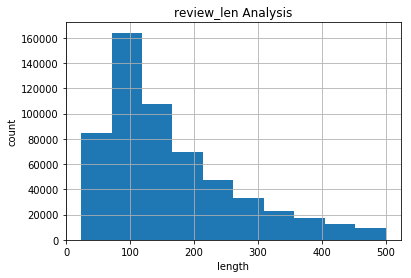

In [20]:
hist = p_train_df['review_len'].hist(bins=10)
s = p_train_df['review_len'].describe(); print(s)
# print('reveiw_len <= 20 :',len(p_train_df[p_train_df['reveiw_len']<=20]))
print('review_len > 500 :',len(p_train_df[p_train_df['review_len']>500])) # # max pos, max_enc_steps 
plt.ylabel('count')
plt.xlabel('length')

plt.title('review_len Analysis')

summary_len > 20 : 0
count    569349.000000
mean         11.205610
std           3.033007
min           6.000000
25%           9.000000
50%          11.000000
75%          13.000000
max          20.000000
Name: summary_len, dtype: float64


Text(0.5, 1.0, 'summary_len Analysis')

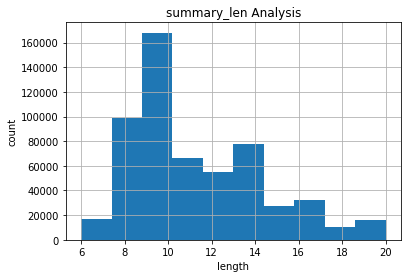

In [21]:
print('summary_len > 20 :',len(p_train_df[p_train_df['summary_len']>20]))  # max_dec_steps
# print('summary_len <= 5 :',len(p_train_df[p_train_df['summary_len']<6])) # min_dec_steps
hist = p_train_df['summary_len'].hist(bins=10)
s = p_train_df['summary_len'].describe(); print(s)
plt.ylabel('count')
plt.xlabel('length')
plt.title('summary_len Analysis')

# Rating

Text(0.5, 1.0, 'Rating')

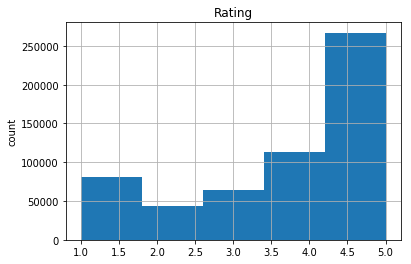

In [22]:
hist = p_train_df['rating'].hist(bins=5)
# s = p_train_df['vote'].describe(); print(s)
plt.ylabel('count')
plt.title('Rating')

# sentiment

summary_polarity and summary_subjectivity  > 0 : 497425
count    569349.000000
mean          0.618740
std           0.219288
min           0.022222
25%           0.475000
50%           0.600000
75%           0.750000
max           1.000000
Name: summary_subjectivity, dtype: float64


Text(0.5, 1.0, 'summary_subjectivity')

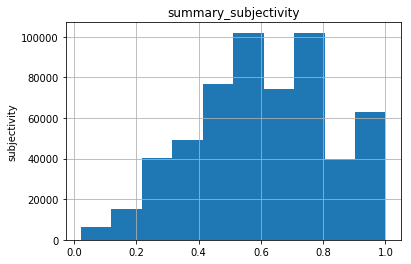

In [23]:
print('summary_polarity and summary_subjectivity  > 0 :',len(p_train_df[
    (abs(p_train_df['summary_polarity'])>0.1) &
    (p_train_df['summary_subjectivity']>0.25)

]))  # max_dec_steps
# print('summary_len <= 5 :',len(p_train_df[p_train_df['summary_len']<6])) # min_dec_steps

hist = p_train_df['summary_subjectivity'].hist(bins=10)
s = p_train_df['summary_subjectivity'].describe(); print(s)
plt.ylabel('subjectivity')
plt.title('summary_subjectivity')

summary_polarity and summary_subjectivity  > 0 : 497425
count    569349.000000
mean          0.348173
std           0.407641
min          -1.000000
25%           0.137500
50%           0.400000
75%           0.633333
max           1.000000
Name: summary_polarity, dtype: float64


Text(0.5, 1.0, 'summary_polarity')

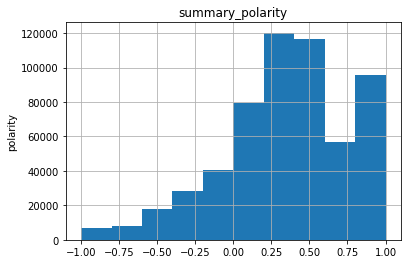

In [24]:
print('summary_polarity and summary_subjectivity  > 0 :',len(p_train_df[
    (abs(p_train_df['summary_polarity'])>0.1) &
    (p_train_df['summary_subjectivity']>0.25)

]))  # max_dec_steps
# print('summary_len <= 5 :',len(p_train_df[p_train_df['summary_len']<6])) # min_dec_steps

hist = p_train_df['summary_polarity'].hist(bins=10)
s = p_train_df['summary_polarity'].describe(); print(s)
plt.ylabel('polarity')
plt.title('summary_polarity')

# POS_Keyword

In [25]:
p_train_df['len_Pos_keys'] = 0
f = lambda x: len(eval(x))
p_train_df['len_Pos_keys'] = p_train_df['POS_keys'].apply(f)
p_train_df[['POS_keys','len_Pos_keys']].head()
p_train_df[['POS_keys','len_Pos_keys']].describe()

,len_Pos_keys
count,569349.000000
mean,22.345142
std,14.710863
min,1.000000
25%,12.000000
50%,18.000000
75%,29.000000
max,131.000000


In [26]:
print(len(p_train_df[p_train_df['len_Pos_keys']<=5]))

15260


# DEP_Keyword

In [27]:
p_train_df['len_DEP_keys'] = 0
f = lambda x: len(eval(x))
p_train_df['len_DEP_keys'] = p_train_df['DEP_keys'].apply(f)
p_train_df[['DEP_keys','len_DEP_keys']].head()
p_train_df[['DEP_keys','len_DEP_keys']].describe()

,len_DEP_keys
count,569349.000000
mean,41.605648
std,28.794488
min,0.000000
25%,20.000000
50%,33.000000
75%,55.000000
max,215.000000


In [28]:
print(len(p_train_df[p_train_df['len_DEP_keys']<=5]))

4382


# TextRank_Keyword

In [29]:
p_train_df.columns

Index(['review_ID', 'rating', 'vote', 'binaryrating', 'orign_review',
       'orign_summary', 'review', 'summary', 'cheat', 'cheat_num', 'overlap',
       'review_len', 'summary_len', 'POS_keys', 'DEP_keys', 'Noun_adj_keys',
       'TextRank_keys', 'len_lcs', 'percent_lcs', 'overlap_pos', 'token_lcs',
       'summary_polarity', 'summary_subjectivity', 'len_Pos_keys',
       'len_DEP_keys'],
      dtype='object')

In [30]:
p_train_df['len_TextRank_keys'] = 0
f = lambda x: len(eval(x))
p_train_df['len_TextRank_keys'] = p_train_df['TextRank_keys'].apply(f)
p_train_df[['TextRank_keys','len_TextRank_keys']].head()
p_train_df[['TextRank_keys','len_TextRank_keys']].describe()

,len_TextRank_keys
count,569349.000000
mean,6.253837
std,4.250768
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,42.000000


In [31]:
print(len(p_train_df[p_train_df['len_TextRank_keys']<=1]))

25356


# Prune data length

In [32]:
print('review_len <= 500 and summary_len<= 20 and summary_polarity > 0.1 and summary_subjectivity > 0.25 : ',len(p_train_df[
    (p_train_df['review_len']<=500) & (p_train_df['summary_len']<=20) &
    (abs(p_train_df['summary_polarity'])>0.1) &
    (p_train_df['summary_subjectivity']>0.1) 
#     (p_train_df['len_TextRank_keys']>0) 
#     (p_train_df['len_DEP_keys']>5) & 
#     (p_train_df['len_Pos_keys']>5)
                                        ]))
print('review_len <= 500 and summary_len<= 20 and summary_polarity > 0.1 and summary_subjectivity > 0.25 : ',len(p_val_df[
    (p_val_df['review_len']<=500) & (p_val_df['summary_len']<=20) &
    (abs(p_val_df['summary_polarity'])>=0.1) &
    (p_val_df['summary_subjectivity']>=0.1)    
                                        ]))

# # first_acc = 0.325
min_df = p_train_df[
    (p_train_df['review_len']<=500) & (p_train_df['summary_len']<=20) &
    (abs(p_train_df['summary_polarity'])>=0.1) &
    (p_train_df['summary_subjectivity']>=0.1)    
                                        ]

# print('reveiw_len > 7000 :',len(p_train_df[p_train_df['reveiw_len']>=700])) # # max pos, max_enc_steps 
# s = p_train_df['reveiw_len'].describe(); print(s)
# s = s.drop(labels = ['count'])
# s.plot.bar()
# plt.ylabel('length')
# plt.title('reveiw_len')
# plt.show()

review_len <= 500 and summary_len<= 20 and summary_polarity > 0.1 and summary_subjectivity > 0.25 :  512182
review_len <= 500 and summary_len<= 20 and summary_polarity > 0.1 and summary_subjectivity > 0.25 :  58903


# percent_lcs EDA(20 divided)

count    529491.000000
mean         54.506104
std          20.875314
min           5.882353
25%          37.500000
50%          50.000000
75%          75.000000
max          90.000000
Name: percent_lcs, dtype: float64


Text(0.5, 1.0, 'percent_lcs')

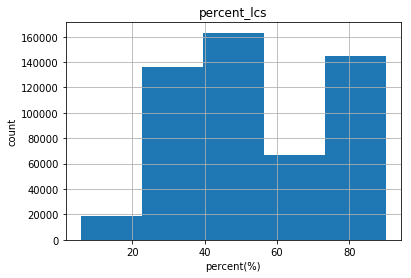

In [33]:
hist = min_df['percent_lcs'].hist(bins=5)
s = min_df['percent_lcs'].describe(); print(s)
plt.ylabel('count')
plt.xlabel('percent(%)')
plt.title('percent_lcs')

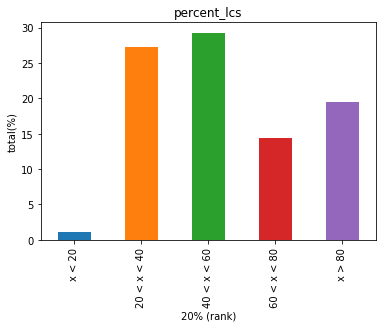

In [34]:
# 统计学上的四分为函数
# 原则上p是可以取0到1之间的任意值的。但是有一个四分位数是p分位数中较为有名的。

# 所谓四分位数；即把数值由小到大排列并分成四等份，处于三个分割点位置的数值就是四分位数。

# 第1四分位数 (Q1)，又称“较小四分位数”，等于该样本中所有数值由小到大排列后第25%的数字。
# 第2四分位数 (Q2)，又称“中位数”，等于该样本中所有数值由小到大排列后第50%的数字。
# 第3四分位数 (Q3)，又称“较大四分位数”，等于该样本中所有数值由小到大排列后第75%的数字。
# 第3四分位数与第1四分位数的差距又称四分位距（InterQuartile Range,IQR）

s = pd.Series({'x < 20':len(min_df[min_df['percent_lcs']<20])/len(min_df)*100, 
           '20 < x < 40':len(min_df[(min_df['percent_lcs']>20) & (min_df['percent_lcs']<40)])/len(min_df)*100, 
           '40 < x < 60':len(min_df[(min_df['percent_lcs']>40) & (min_df['percent_lcs']<60)])/len(min_df)*100, 
           '60 < x < 80':len(min_df[(min_df['percent_lcs']>60) & (min_df['percent_lcs']<80)])/len(min_df)*100, 
           'x > 80':len(min_df[min_df['percent_lcs']>80])/len(min_df)*100          
          })
s.plot.bar()
plt.ylabel('total(%)')
plt.xlabel('20% (rank)')
plt.title('percent_lcs')
plt.show()

overlap Top :10.87 %
overlap Final :0.00 %
overlap Other Pos :34.89 %
No overlap :54.25 %


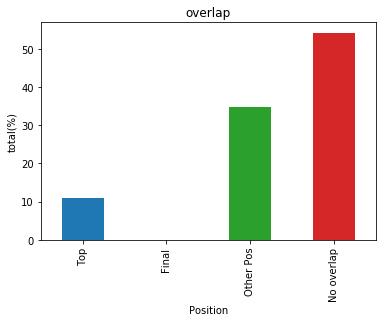

In [35]:
'''
overlap => percent_lcs > (50% summary len)
overlap_pos : 0 Top
overlap_pos : 1 Final
overlap_pos : 2 Other Pos
overlap_pos : -1 No overlap
'''

print('overlap Top :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 0) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
print('overlap Final :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 1) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
print('overlap Other Pos :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
print('No overlap :%2.2f'% float(len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100),'%') 

s = pd.Series({'Top':len(min_df[(min_df['overlap_pos'] == 0) & (min_df['percent_lcs']>50)])/len(min_df)*100, 
           'Final':len(min_df[(min_df['overlap_pos'] == 1) & (min_df['percent_lcs']>50)])/len(min_df)*100,      
           'Other Pos':len(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)])/len(min_df)*100,  
           'No overlap':len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100,  
          })
s.plot.bar()
plt.ylabel('total(%)')
plt.xlabel('Position')
plt.title('overlap')
plt.show()

# Ext/Abs分界(50)

percent_lcs x > 50  45.75 %
percent_lcs x <= 50  54.25 %


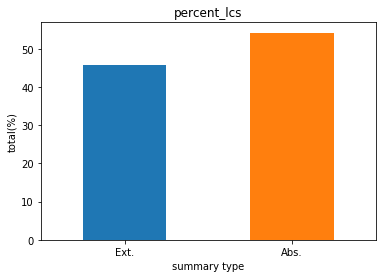

In [36]:
print('percent_lcs x > 50  %2.2f'% float(len(min_df[(min_df['percent_lcs']>50)])/len(min_df)*100),'%')  # max_dec_steps
print('percent_lcs x <= 50  %2.2f'% float(len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100),'%')  # max_dec_steps

s = pd.Series({'Ext.':len(min_df[(min_df['percent_lcs']>50)])/len(min_df)*100, 
           'Abs.':len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100,      
          })
s.plot.bar()
plt.ylabel('total(%)')
plt.xlabel('summary type')
plt.title('percent_lcs')
plt.xticks(rotation=0)
plt.show()

overlap Top :10.87 %
overlap Final :0.00 %
overlap Other Pos :34.89 %
No overlap :54.25 %


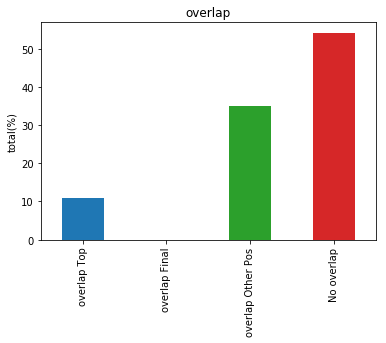

In [37]:
'''
overlap => percent_lcs > (50% summary len)
overlap_pos : 0 Top
overlap_pos : 1 Final
overlap_pos : 2 Other Pos
overlap_pos : -1 No overlap
'''

print('overlap Top :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 0) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
print('overlap Final :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 1) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
print('overlap Other Pos :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
print('No overlap :%2.2f'% float(len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100),'%') 

s = pd.Series({'overlap Top':len(min_df[(min_df['overlap_pos'] == 0) & (min_df['percent_lcs']>50)])/len(min_df)*100, 
           'overlap Final':len(min_df[(min_df['overlap_pos'] == 1) & (min_df['percent_lcs']>50)])/len(min_df)*100,      
           'overlap Other Pos':len(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)])/len(min_df)*100,  
           'No overlap':len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100,  
          })
s.plot.bar()
plt.ylabel('total(%)')
plt.title('overlap')
plt.show()

In [38]:
def view(df, condition, view_num=10):
    package_dict = []
    for i in range(view_num):
        d1 = dict(min_df[eval(condition)].iloc[i])
        d2 = {'review':d1['review'],
              'summary':d1['summary'],
              'summary_subjectivity':d1['summary_subjectivity'],
              'summary_polarity':d1['summary_polarity'],
#               'token_lcs':d1['token_lcs'],
#               'overlap':d1['overlap'],
#               'percent_lcs':d1['percent_lcs'],
              'keywords':d1['POS_keys']            
             }
        package_dict.append(d2)
    return package_dict
        
# view(min_df, "(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']<50)")
view(min_df, "(min_df['review_len']<=50) & (min_df['percent_lcs']<=40) & (min_df['summary_len']>=15) & (min_df['summary_subjectivity']>=0.1)")



[{'review': 'the two cat who eat treat loved kitty ka vium but sometime i noticed they sneezed a lot afterward . the larger bonitum tuna flake are easier for them to pick up and eat without getting them up their nose and they seem to prefer the bigger size too .',
  'summary': '<s> ha replaced kitty ka vium a the favorite cat treat in my household </s>',
  'summary_subjectivity': 1.0,
  'summary_polarity': 0.5,
  'keywords': "['', '']"},
 {'review': 'thi came with a car charger that do not work . came inside sealed box . i can not return thi item and get another at the cyber monday price . now i will spend another dollar for car charger . the usb cord is only inch long .',
  'summary': '<s> wrong cord inside box questioning if product is new or counterfeit came sealed </s>',
  'summary_subjectivity': 0.6772727272727272,
  'summary_polarity': -0.1818181818181818,
  'keywords': "['', '', 'return', 'thi', 'dollar', 'spend', '']"},
 {'review': 'my first avenir over yr also very easy on the

In [39]:
dict(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)].iloc[0:10])['summary']

191878    <s> the bring amazing in love with fuji camera...
250707    <s> if you are really good at tying bandana an...
263423            <s> most versatile rod in my arsenal </s>
58812      <s> but not any good for music or other use </s>
43007     <s> thi is a fantastic flash with little optio...
439630    <s> and even my doctor said the glu cern a wa ...
143099    <s> the sound is loud enough to easily be hear...
496237    <s> you will not be disappointed if you need m...
356691    <s> perfect for board game use not so much for...
303926            <s> do not fit magpul moe hand guard </s>
Name: summary, dtype: object